In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

In [6]:
dataset = pd.read_csv('Datasets/ba_salaries_clean.csv')
dataset

,Unnamed: 0,Year,Company,City,State,Title,Salary Level,Area,Total Annual Compensation,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College
0,0,2020,UBS,Krakow,MA,Business Analyst,1,Analytic,40000,5,2.0,40000,0,0,0,0,0,0,0
1,1,2021,HCA Healthcare,Nashville,TN,Business Analyst,1,Inventory,41000,1,1.0,41000,0,0,0,1,0,0,0
2,2,2021,Qualtrics,Provo,UT,Business Analyst,1,General,48000,0,0.0,44000,1000,3000,0,0,0,0,0
3,3,2021,Clearwater Analytics,Boise,ID,Business Analyst,1,general,50000,5,0.0,48000,0,0,1,0,0,0,0
4,4,2020,CIBC,Ontario,CA,Business Analyst,1,Product,50000,2,1.0,50000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,490,2020,Bank of America,New York,NY,Business Analyst,3,Analytic,225000,8,8.0,205000,4000,20000,1,0,0,0,0
491,491,2020,Goldman Sachs,New York,NY,Business Analyst,3,Analyst,210000,0,0.0,210000,0,0,0,0,0,0,0
492,492,2020,Google,Seattle,WA,Business Analyst,3,Analytic,500000,13,1.0,240000,200000,60000,0,0,1,0,0
493,493,2021,Intel,Santa Clara,CA,Business Analyst,3,Operations Finance,482000,21,21.0,244000,114000,123000,0,1,0,0,0


In [7]:
dataset.describe ()

,Unnamed: 0,Year,Salary Level,Total Annual Compensation,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0,495.00000
mean,247.000000,2020.454545,1.591919,137341.414141,5.303030,2.263232,109559.595960,15088.888889,12838.383838,0.242424,0.311111,0.006061,0.0,0.00404
std,143.038456,0.526095,0.516073,62189.036959,4.860929,2.980568,33797.144069,24494.735818,16495.310995,0.428983,0.463416,0.077692,0.0,0.06350
min,0.000000,2018.000000,1.000000,40000.000000,0.000000,0.000000,40000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
25%,123.500000,2020.000000,1.000000,94000.000000,2.000000,1.000000,82000.000000,0.000000,2500.000000,0.000000,0.000000,0.000000,0.0,0.00000
50%,247.000000,2020.000000,2.000000,123000.000000,4.000000,1.000000,105000.000000,5000.000000,10000.000000,0.000000,0.000000,0.000000,0.0,0.00000
75%,370.500000,2021.000000,2.000000,166000.000000,7.000000,3.000000,130000.000000,20000.000000,17000.000000,0.000000,1.000000,0.000000,0.0,0.00000
max,494.000000,2021.000000,3.000000,500000.000000,45.000000,24.000000,250000.000000,200000.000000,145000.000000,1.000000,1.000000,1.000000,0.0,1.00000


In [21]:
ds = pd.read_csv("Datasets/ba_salaries_clean.csv", usecols = ['Salary Level', 'Total Annual Compensation', 'Years at Company', 'Years of Experience'])
ds

,Salary Level,Total Annual Compensation,Years of Experience,Years at Company
0,1,40000,5,2.0
1,1,41000,1,1.0
2,1,48000,0,0.0
3,1,50000,5,0.0
4,1,50000,2,1.0
...,...,...,...,...
490,3,225000,8,8.0
491,3,210000,0,0.0
492,3,500000,13,1.0
493,3,482000,21,21.0


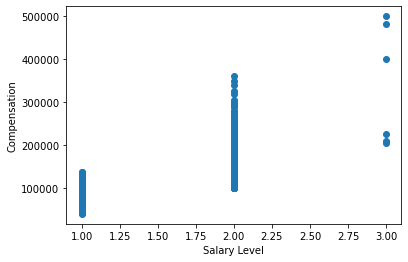

In [22]:
plt.scatter( ds['Salary Level'] ,ds['Total Annual Compensation'] )
plt.xlabel('Salary Level')
plt.ylabel('Compensation')
plt.show()

In [23]:
X = ds.drop('Total Annual Compensation',axis=1)
y = ds['Total Annual Compensation']

In [24]:
X.shape , y.shape

((495, 3), (495,))

In [25]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=495,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((396, 3), (99, 3), (396,), (99,))

In [26]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [27]:
pred = lr.predict(X_test)
pred

array([170508.43068486, 161863.97350188, 181295.4804183 , 161588.17275931,
       185029.06403407, 170784.23142744, 156263.59807823, 161588.17275931,
       157992.48951483, 161588.17275931, 168779.53924827, 163317.0641959 ,
       159997.181694  ,  92863.28783871, 188624.74727855,  87538.71315764,
        80209.44629739, 174242.01430063, 179566.58898171, 163317.0641959 ,
       181295.4804183 ,  80209.44629739, 156263.59807823, 105930.8304939 ,
        83943.02991316, 188762.64764984, 172375.22249275, 177975.5979164 ,
       165183.85600379, 165321.75637507, 125224.43703903, 172651.02323532,
       170646.33105615,  80209.44629739, 190353.63871515,  96596.87145448,
        80209.44629739, 174242.01430063, 170646.33105615, 166912.74744038,
        80209.44629739, 165597.55711765, 167050.64781167,  80209.44629739,
        91410.19714469, 186757.95547067,  83943.02991316,  85809.82172104,
        82076.23810527, 158130.38988611, 161863.97350188,  85671.92134975,
       188762.64764984, 1

In [28]:
Y_test

360    130000
326    130000
246    100000
385    165000
374    169000
        ...  
235    107000
75      80000
64      85000
312    131000
209    125000
Name: Total Annual Compensation, Length: 99, dtype: int64

In [29]:
diff = Y_test - pred

In [30]:
pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,130000.0,170508.430685,-40508.430685
1,130000.0,161863.973502,-31863.973502
2,100000.0,181295.480418,-81295.480418
3,165000.0,161588.172759,3411.827241
4,169000.0,185029.064034,-16029.064034
...,...,...,...
94,107000.0,156263.598078,-49263.598078
95,80000.0,82076.238105,-2076.238105
96,85000.0,83805.129542,1194.870458
97,131000.0,214070.330732,-83070.330732


ValueError: x and y must be the same size

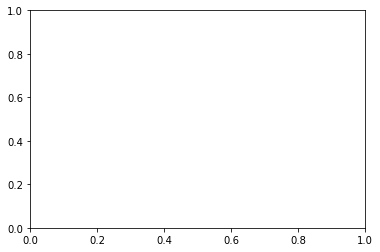

In [31]:
plt.scatter(X_train , Y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Salary vs Level')
plt.xlabel('Salary Level')
plt.ylabel("Salary")
plt.show()

ValueError: x and y must be the same size

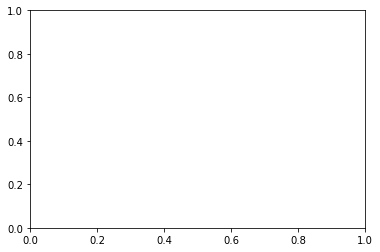

In [32]:
plt.scatter(X_test , Y_test,color='blue')
plt.plot(X_test ,lr.predict(X_test) ,color='red')
plt.title('Salary vs Level')
plt.xlabel('Salary Level')
plt.ylabel("Salary")
plt.show()

In [33]:
lr.score(X_test , Y_test)

0.4956648789837693